# 23_Errorbars_fit

In this program some given data will be plotted with error bars. It is fitted as an exponential decay and the asymptotic curve is represented.

In [1]:
## Imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
## Definition of functions
# for the exponential decay and a linear function

def lin_fit(x,a,b):
    return a*x+b
    
def exp_fit(x,A,b):
    return A*np.exp(-b*x)

In [3]:
## Data definition

time = np.linspace(0,17*5,18) # minutes
print(time)

# The number of ions counted at the different time
N_ions        = np.array([30, 24, 22, 15, 14, 12, 8.5, 8, 8, 8, 6, 3, 3, 3, 3, 3, 1, 0])

# The uncertainty about this number of ions
N_ions_margin = np.array([2,   2,  2,  1,  1,  1,   1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# this is data from REIN 241001.

[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85.]


In [4]:
# Fitting the N_ions with the exponential decay

popt, pcov = curve_fit(exp_fit,
                        time,
                        N_ions,
                        maxfev=10000)

# If you want to avoid the warning ' RuntimeWarning: overflow encountered in exp return A*np.exp(-b*x) '
# add to the curve_fit the following parameter : bounds=([25,1e-3],[35,1])

print(popt)
print(np.diag(pcov))
print(np.linalg.cond(pcov))

[29.39714421  0.03607572]
[7.22305361e-01 2.72178351e-06]
458526.5216966274


/var/folders/75/jx9j_6b51pd1_6tgvbf8rjm80000gs/T/ipykernel_54662/3674495867.py:8: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-b*x)


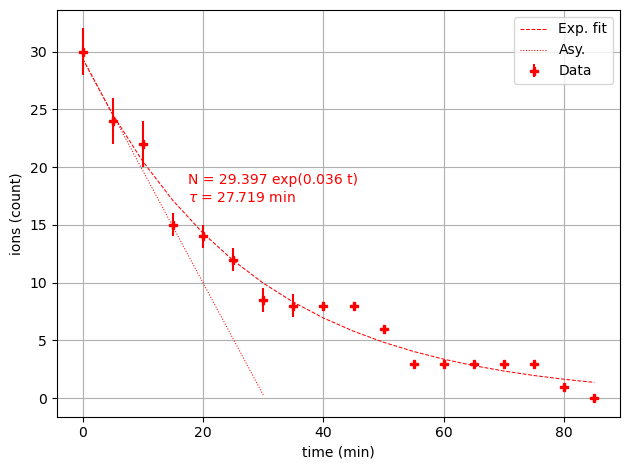

In [5]:
# Setting the plot

figname = 'Ion_count_vs_time'
fig, ax = plt.subplots(num=figname,clear='True')

# plot the exponential decay
ax.plot(time,exp_fit(time,*popt),
        ls='--',lw=0.75,
        color='xkcd:fire engine red',
        label='Exp. fit')

# plot the asymptotic curve to the exponential decay

# This is the gradient at the origin of the exponential decay
# used as the solpe of the asymptotic line
slope = np.gradient(exp_fit(time,*popt),time)[0]

ax.plot(time[:7],
        lin_fit(time[:7],slope,exp_fit(time,*popt)[0]),
        ls=':',lw=0.75,
        color='xkcd:fire engine red',
        label='Asy.')

# plot the data with errorbars
# vertical errorbars are contained in array N_ions_margin
# this plots them as + - for each point
ax.errorbar(time,N_ions,
    yerr=N_ions_margin,
    marker='P',ls='',
    color='xkcd:fire engine red',
    label='Data')

# text to display the equation of the exponential decay
ax.text(17.5,17,
        f'N = {popt[0]:.3f} exp({popt[1]:.3f} t)\n\
$\\tau$ = {1/popt[1]:.3f} min',
        color='xkcd:fire engine red')

# some plot parameters
ax.set_xlabel('time (min)')
ax.set_ylabel('ions (count)')

ax.legend()

ax.grid()
plt.tight_layout()

# saving the plot
# as a '.png' file
# with resolution of 300 dpi (the minimum for any printed decent result)
plt.savefig(figname+'.png',dpi=300)

In [6]:
# Some help about the errorbar function from matplotlib.pyplot
help(plt.errorbar)

Help on function errorbar in module matplotlib.pyplot:

errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)
    Plot y versus x as lines and/or markers with attached errorbars.
    
    *x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
    sizes. By default, this draws the data markers/lines as well the
    errorbars. Use fmt='none' to draw errorbars without any data markers.
    
    .. versionadded:: 3.7
       Caps and error lines are drawn in polar coordinates on polar plots.
    
    
    Parameters
    ----------
    x, y : float or array-like
        The data positions.
    
    xerr, yerr : float or array-like, shape(N,) or shape(2, N), optional
        The errorbar sizes:
    
        - scalar: Symmetric +/- values for all data points.
        - shape(N,): Symmetric +/-values for each data poin

In [ ]:
scipy and error propagation